# BLOCK 7: About your Neighborhood

Create maps for variables: `b_seguretat` and `b_joc`.

\[MAP - Neighborhood security\]  compare  to \[MAP  - Neighborhood palygrounds\]

Colour the maps based on the variables and add as additional info (maybe text box) the RFD-sumw

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
sns.set(style='whitegrid')

# LOAD FUNCTIONS
%run useful_functions.ipynb

In [ ]:
all_values = []

# `b_seguretat`

<AxesSubplot:>

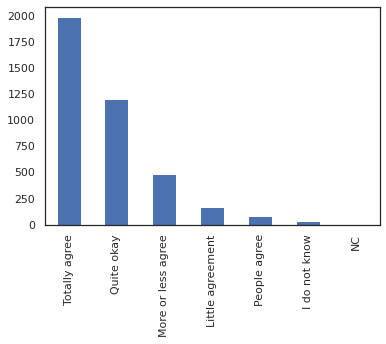

In [ ]:
df_t['b_seguretat'].value_counts().plot(kind='bar')

In [ ]:
with open('../data/districtes-original.json') as f:
  geojson = json.load(f)

In [ ]:
codis = 'Codi_Districte_Educatiu'
for codi in df_t[codis].unique():
    tmp = df_t.loc[(df_t[codis]== codi)][['Codi_Districte_Educatiu', 'b_seguretat']]
    
    res = tmp.groupby(['Codi_Districte_Educatiu'])['b_seguretat'].value_counts(normalize=True)

    for i, v in res.iteritems():
        if i[1] == "Totally agree":
            for feature in geojson['features']:
                if int(feature['id']) == i[0]:
                    feature['properties']['b_seguretat'] = round(v, 2)
                    all_values.append(round(v, 2))

In [ ]:
with open("../data/districtes.json", "w") as write_file:
    json.dump(geojson, write_file)

# `b_joc`

<AxesSubplot:>

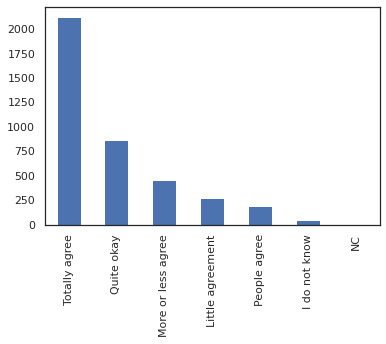

In [ ]:
df_t['b_joc'].value_counts().plot(kind='bar')

In [ ]:
with open('../data/districtes.json') as f:
  geojson = json.load(f)

In [ ]:
codis = 'Codi_Districte_Educatiu'
for codi in df_t[codis].unique():
    tmp = df_t.loc[(df_t[codis]== codi)][['Codi_Districte_Educatiu', 'b_joc']]
    
    res = tmp.groupby(['Codi_Districte_Educatiu'])['b_joc'].value_counts(normalize=True)

    for i, v in res.iteritems():
        if i[1] == "Totally agree":
            for feature in geojson['features']:
                if int(feature['id']) == i[0]:
                    feature['properties']['b_joc'] = round(v, 2)
                    all_values.append(round(v, 2))

In [ ]:
with open("../data/districtes.json", "w") as write_file:
    json.dump(geojson, write_file)

In [ ]:
# Bins

In [ ]:
min(all_values)

0.42

In [ ]:
W = 3
hist, bin_edges = np.histogram(all_values, bins=int(len(all_values)/W))
print(hist)
print(bin_edges)

[5 3 2 1 3 6]
[0.42       0.45166667 0.48333333 0.515      0.54666667 0.57833333
 0.61      ]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cb1a2c0-2f56-40d6-8008-fedeaf8b6a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>